## Alzheime image dataset in google drive
https://drive.google.com/drive/folders/1kt01BgWeiJW8iCcS29Mu9eOTMLlgjs5s?usp=drive_link

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# set up path
base_path = '/content/gdrive/MyDrive/Colab Notebooks/final project/Alzheimer Dataset'

moderate_demented_path = os.path.join(base_path, 'Moderate_Demented')
mild_demented_path = os.path.join(base_path, 'Mild_Demented')
very_mild_demented_path = os.path.join(base_path, 'Very_Mild_Demented')
non_demented_path = os.path.join(base_path, 'Non_Demented')

In [3]:
# Image paths
image_paths = [os.path.join(mild_demented_path, filename) for filename in os.listdir(mild_demented_path) if filename.endswith(".jpg")]

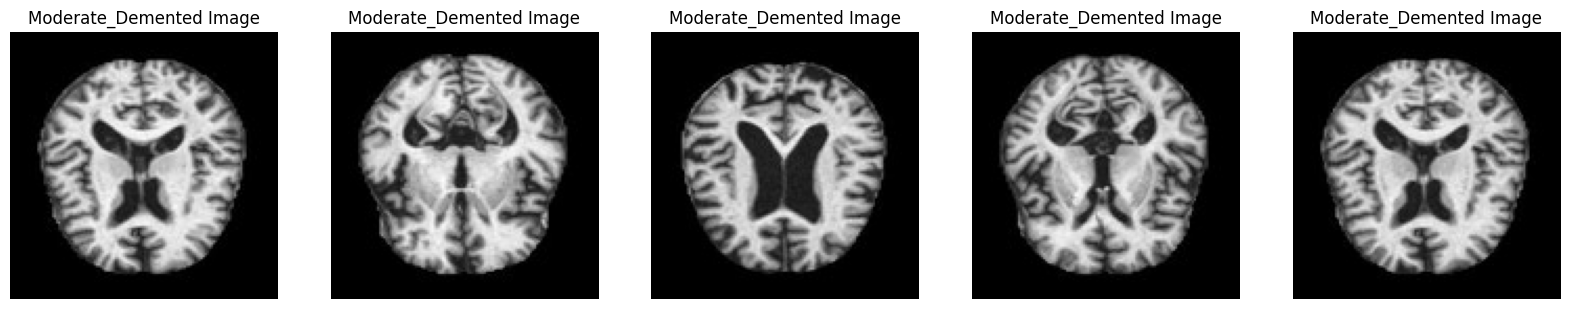

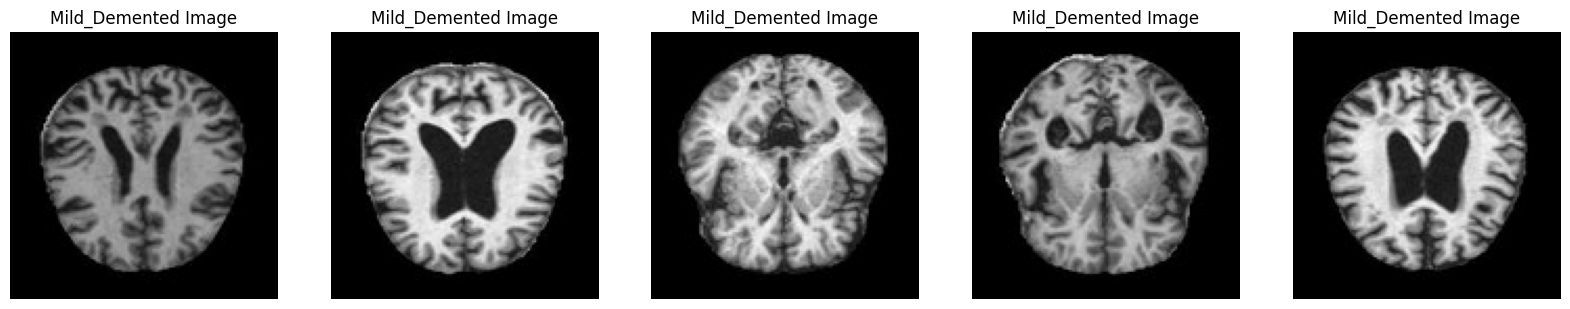

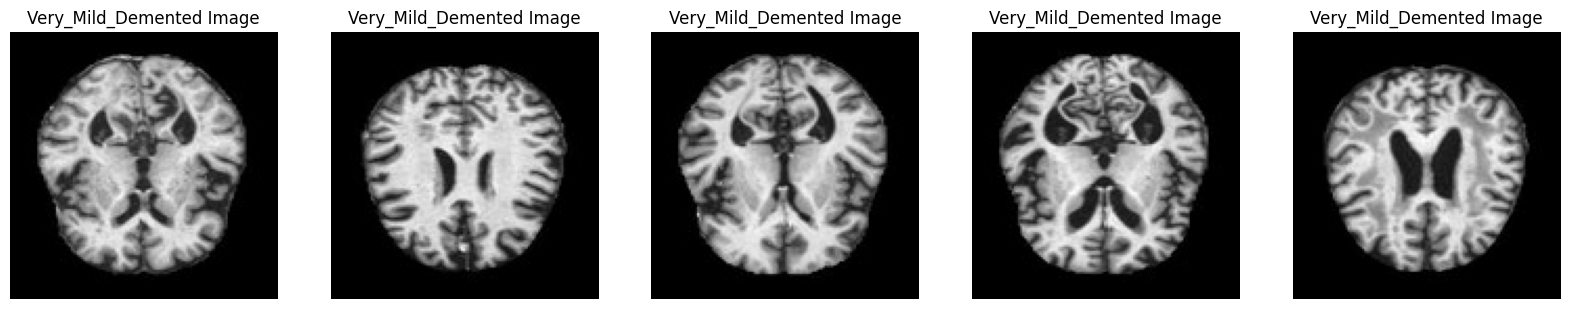

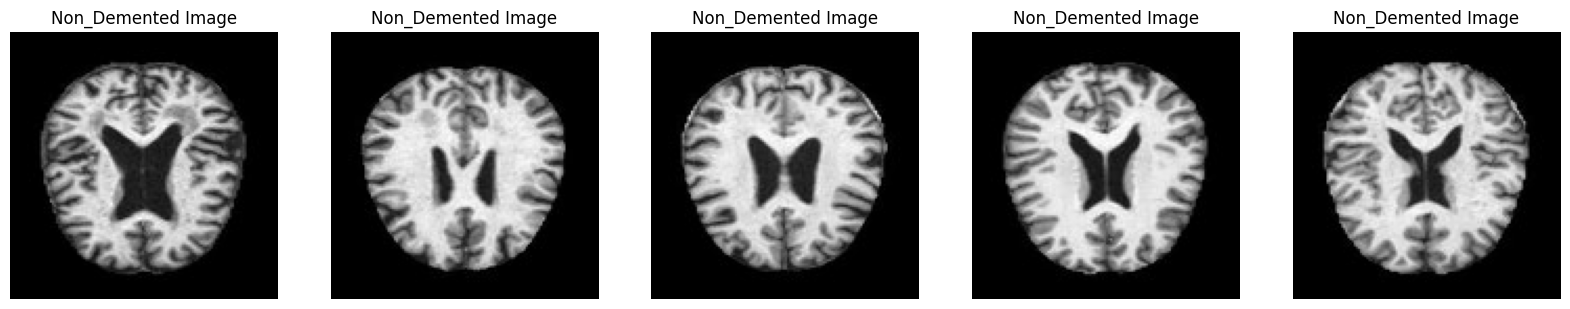

In [4]:
# Visualize images with titles for different classes
classes = ["Moderate_Demented", "Mild_Demented", "Very_Mild_Demented", "Non_Demented"]

for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    image_paths = [os.path.join(class_path, filename) for filename in os.listdir(class_path) if filename.endswith(".jpg")]

    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, img_path in enumerate(image_paths[:5]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"{class_name} Image", fontsize= 12)

    plt.show()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [6]:
# Function to load and preprocess images
def load_images(image_paths, label):
    images = []
    labels = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))  # Resize to a common size
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

In [7]:
# Load images for each class
X_moderate_demented, y_moderate_demented = load_images([os.path.join(moderate_demented_path, filename) for filename in os.listdir(moderate_demented_path) if filename.endswith(".jpg")], 'Moderate_Demented')
X_mild_demented, y_mild_demented = load_images([os.path.join(mild_demented_path, filename) for filename in os.listdir(mild_demented_path) if filename.endswith(".jpg")], 'Mild_Demented')
X_very_mild_demented, y_very_mild_demented = load_images([os.path.join(very_mild_demented_path, filename) for filename in os.listdir(very_mild_demented_path) if filename.endswith(".jpg")], 'Very_Mild_Demented')
X_non_demented, y_non_demented = load_images([os.path.join(non_demented_path, filename) for filename in os.listdir(non_demented_path) if filename.endswith(".jpg")], 'Non_Demented')


In [8]:
# Concatenate data from all classes
X = np.concatenate([X_moderate_demented, X_mild_demented, X_very_mild_demented, X_non_demented])
y = np.concatenate([y_moderate_demented, y_mild_demented, y_very_mild_demented, y_non_demented])

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# One-hot encode the labels
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))

In [11]:
# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  # Additional convolutional layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes: Moderate_Demented, Mild_Demented, Very_Mild_Demented, Non_Demented
])
# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 flatten (Flatten)           (None, 760384)            0         
                                                                 
 dense (Dense)               (None, 64)                48664640  
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                        

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

In [15]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32), epochs=20, validation_data=(X_test, y_test_encoded))

Epoch 1/20
161/161 [==============================] - 342s 2s/step - loss: 120.8918 - accuracy: 0.4705 - val_loss: 1.0475 - val_accuracy: 0.4914
Epoch 2/20
161/161 [==============================] - 345s 2s/step - loss: 1.0487 - accuracy: 0.4862 - val_loss: 1.0313 - val_accuracy: 0.4984
Epoch 3/20
161/161 [==============================] - 340s 2s/step - loss: 1.0406 - accuracy: 0.4812 - val_loss: 1.0433 - val_accuracy: 0.4392
Epoch 4/20
161/161 [==============================] - 341s 2s/step - loss: 1.0386 - accuracy: 0.4898 - val_loss: 1.0330 - val_accuracy: 0.4672
Epoch 5/20
161/161 [==============================] - 345s 2s/step - loss: 1.0334 - accuracy: 0.4925 - val_loss: 1.0549 - val_accuracy: 0.4353
Epoch 6/20
161/161 [==============================] - 335s 2s/step - loss: 1.0291 - accuracy: 0.4909 - val_loss: 1.0242 - val_accuracy: 0.4836
Epoch 7/20
161/161 [==============================] - 341s 2s/step - loss: 1.0243 - accuracy: 0.5034 - val_loss: 1.0360 - val_accuracy: 0.47

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

41/41 [==============================] - 18s 448ms/step - loss: 1.0224 - accuracy: 0.4945
Test Accuracy: 49.45%
